## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [345]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [346]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [347]:
def get_city_weather(cities):
    '''
    This function gets weather-related info for specified cities from the OpenWeatherMap API.
    Units can be specified as 'imperial' (F) or 'metric' (C) or 'standard' (K).
    
    * The function takes a list of cities as an argument.
    * The function returns nine lists: cities, lat, lon, temp_max, humidity, cloudiness, windspeed, country, date
    * The function also prints out a log as each city is processed.
    
    Create an API key for this function here: https://openweathermap.org/home/sign_up
    '''
    # specify units: "imperial", "metric" or "standard"
    units = 'imperial'
    
    cities_retrieved = []
    lat = []
    lon = []
    temp_max = []
    humidity = []
    cloudiness = []
    windspeed = []
    country = []
    date = []
    
    counter = 1
    
    for city in cities:
        query_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
        
        response = requests.get(query_url)
        
        if response.status_code == 200:
            data = response.json()
            
            if len(cities_retrieved) == 0:
                print('''Beginning Data Retrieval   
-----------------------------''')
            
            print(f'Processing record {counter} of {len(cities)} | {city}')
            
            cities_retrieved.append(city)
            lat.append(data['coord']['lat'])
            lon.append(data['coord']['lon'])
            temp_max.append(data['main']['temp_max'])
            humidity.append(data['main']['humidity'])
            cloudiness.append(data['clouds']['all'])
            windspeed.append(data['wind']['speed'])
            country.append(data['sys']['country'])
            date.append(time.time())
        
        else:
            print('City not found. BUMMER! Skipping...')
        
        counter += 1
    
    print(f'Data retrieved for {len(cities_retrieved)} out of {len(cities)} cities. YAY!!!')
    
    return cities_retrieved, lat, lon, temp_max, humidity, cloudiness, windspeed, country, date

In [348]:
cities_retrieved, lat, lon, temp_max, humidity, cloudiness, windspeed, country, date = get_city_weather(cities)

Beginning Data Retrieval   
-----------------------------
Processing record 1 of 629 | vao
Processing record 2 of 629 | cape town
Processing record 3 of 629 | nanortalik
Processing record 4 of 629 | port blair
Processing record 5 of 629 | ayan
City not found. BUMMER! Skipping...
Processing record 7 of 629 | inuvik
Processing record 8 of 629 | puerto ayora
Processing record 9 of 629 | ushuaia
Processing record 10 of 629 | deputatskiy
Processing record 11 of 629 | dunedin
Processing record 12 of 629 | kapaa
Processing record 13 of 629 | castro
Processing record 14 of 629 | bluff
Processing record 15 of 629 | khor
Processing record 16 of 629 | rikitea
Processing record 17 of 629 | raudeberg
Processing record 18 of 629 | albany
Processing record 19 of 629 | busselton
Processing record 20 of 629 | kahului
Processing record 21 of 629 | kamina
Processing record 22 of 629 | puerto escondido
Processing record 23 of 629 | port elizabeth
Processing record 24 of 629 | manta
Processing record 25 of

Processing record 208 of 629 | barentu
Processing record 209 of 629 | lavrentiya
Processing record 210 of 629 | qaanaaq
Processing record 211 of 629 | sindor
Processing record 212 of 629 | nalut
Processing record 213 of 629 | megion
Processing record 214 of 629 | treinta y tres
City not found. BUMMER! Skipping...
Processing record 216 of 629 | conceicao do araguaia
Processing record 217 of 629 | porto empedocle
Processing record 218 of 629 | esperance
Processing record 219 of 629 | beringovskiy
Processing record 220 of 629 | smithers
Processing record 221 of 629 | hami
Processing record 222 of 629 | pasni
Processing record 223 of 629 | pachino
Processing record 224 of 629 | moron
City not found. BUMMER! Skipping...
Processing record 226 of 629 | kotelnich
City not found. BUMMER! Skipping...
Processing record 228 of 629 | porto de moz
Processing record 229 of 629 | upernavik
Processing record 230 of 629 | bhor
Processing record 231 of 629 | arvika
Processing record 232 of 629 | salalah


Processing record 415 of 629 | yerofey pavlovich
Processing record 416 of 629 | guerrero negro
Processing record 417 of 629 | yeppoon
Processing record 418 of 629 | multan
Processing record 419 of 629 | hualmay
City not found. BUMMER! Skipping...
City not found. BUMMER! Skipping...
Processing record 422 of 629 | kindia
Processing record 423 of 629 | cayenne
Processing record 424 of 629 | ust-maya
Processing record 425 of 629 | muros
City not found. BUMMER! Skipping...
Processing record 427 of 629 | puerto montt
Processing record 428 of 629 | arlit
Processing record 429 of 629 | neiafu
Processing record 430 of 629 | barkhan
Processing record 431 of 629 | vikramasingapuram
Processing record 432 of 629 | mackay
Processing record 433 of 629 | auki
Processing record 434 of 629 | puerto vallarta
Processing record 435 of 629 | tanabe
Processing record 436 of 629 | praia da vitoria
Processing record 437 of 629 | menongue
Processing record 438 of 629 | lungi
Processing record 439 of 629 | namib

Processing record 622 of 629 | gladstone
Processing record 623 of 629 | vila do maio
Processing record 624 of 629 | alamos
Processing record 625 of 629 | novobelokatay
Processing record 626 of 629 | san policarpo
Processing record 627 of 629 | husavik
Processing record 628 of 629 | tessalit
Processing record 629 of 629 | udachnyy
Data retrieved for 572 out of 629 cities. YAY!!!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [349]:
# put data in a data frame

weather_dict = {
    'city': cities_retrieved,
    'lat': lat,
    'lon': lon,
    'temp_max': temp_max,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'windspeed': windspeed,
    'country': country,
    'date/time': date    
}

df_weather_data = pd.DataFrame(weather_dict)
df_weather_data.head(10)

,city,lat,lon,temp_max,humidity,cloudiness,windspeed,country,date/time
0,vao,-22.6667,167.4833,74.43,72,92,26.46,NC,1.619936e+09
1,cape town,-33.9258,18.4232,61.00,93,0,5.75,ZA,1.619936e+09
2,nanortalik,60.1432,-45.2371,34.79,69,85,12.97,GL,1.619936e+09
3,port blair,11.6667,92.7500,86.58,66,14,10.56,IN,1.619936e+09
4,ayan,56.4500,138.1667,32.54,85,97,8.77,RU,1.619936e+09
5,inuvik,68.3499,-133.7218,24.80,86,100,4.61,CA,1.619936e+09
6,puerto ayora,-0.7393,-90.3518,73.00,95,46,5.19,EC,1.619936e+09
7,ushuaia,-54.8000,-68.3000,35.60,80,40,6.91,AR,1.619936e+09
8,deputatskiy,69.3000,139.9000,25.12,87,100,5.41,RU,1.619936e+09
9,dunedin,-45.8742,170.5036,55.11,73,18,4.99,NZ,1.619936e+09


In [ ]:
# export to csv

df_weather_data.to_csv('output_data/city_weather_data.csv', index=False)

In [384]:
# get summary statistics about data frame

df_weather_data.describe()

,lat,lon,temp_max,humidity,cloudiness,windspeed,date/time
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.052860,17.980205,61.924528,68.389860,53.494755,7.820070,1.619936e+09
std,33.522611,90.303211,19.178680,22.733746,37.613692,5.421723,6.040530e+01
min,-54.800000,-175.200000,10.400000,5.000000,0.000000,0.360000,1.619936e+09
25%,-7.686000,-63.085025,46.000000,55.000000,18.750000,3.890000,1.619936e+09
50%,24.790550,25.366750,64.435000,73.000000,59.500000,6.910000,1.619936e+09
75%,50.551475,93.037500,77.000000,86.250000,90.000000,10.770000,1.619936e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,47.180000,1.619936e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [385]:
df_humidity_over_100 = df_weather_data[df_weather_data['humidity'] > 100]

df_humidity_over_100.head(10)

,city,lat,lon,temp_max,humidity,cloudiness,windspeed,country,date/time


In [386]:
#  Get the indices of cities that have humidity over 100%.

df_humidity_over_100.index

Int64Index([], dtype='int64')

In [387]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

df_weather_data_clean = df_weather_data[df_weather_data['humidity'] < 100].reset_index(inplace=False, drop=True)

df_weather_data_clean.head(10)

,city,lat,lon,temp_max,humidity,cloudiness,windspeed,country,date/time
0,vao,-22.6667,167.4833,74.43,72,92,26.46,NC,1.619936e+09
1,cape town,-33.9258,18.4232,61.00,93,0,5.75,ZA,1.619936e+09
2,nanortalik,60.1432,-45.2371,34.79,69,85,12.97,GL,1.619936e+09
3,port blair,11.6667,92.7500,86.58,66,14,10.56,IN,1.619936e+09
4,ayan,56.4500,138.1667,32.54,85,97,8.77,RU,1.619936e+09
5,inuvik,68.3499,-133.7218,24.80,86,100,4.61,CA,1.619936e+09
6,puerto ayora,-0.7393,-90.3518,73.00,95,46,5.19,EC,1.619936e+09
7,ushuaia,-54.8000,-68.3000,35.60,80,40,6.91,AR,1.619936e+09
8,deputatskiy,69.3000,139.9000,25.12,87,100,5.41,RU,1.619936e+09
9,dunedin,-45.8742,170.5036,55.11,73,18,4.99,NZ,1.619936e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [388]:
# add plot style

plt.style.use('bmh')

## Latitude vs. Temperature Plot

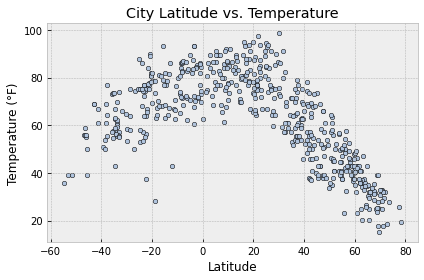

In [389]:
fig1, ax1 = plt.subplots()

df_weather_data_clean[['lat', 'temp_max']].plot(kind='scatter', 
                                                ax=ax1, 
                                                x='lat', 
                                                y='temp_max', 
                                                c='lightsteelblue', 
                                                marker='o', 
                                                edgecolor='black')

ax1.set(title='City Latitude vs. Temperature',
        xlabel='Latitude',
        ylabel='Temperature (°F)'
       )

fig1.tight_layout()

fig1.savefig('output_data/latitude_vs_temperature.png', dpi=200, facecolor='w')

In general, it looks like there are more cities above teh equator than below. There is a much greater distribution of cities above 40 degress north latitude than below 40 degress south latitude. As a result, there are more cities with colder weather above the equator than below. Also, max temperatures seem to peak at 20 degrees north latitude. Could this relate to seasonal variation or some other factor?

## Latitude vs. Humidity Plot

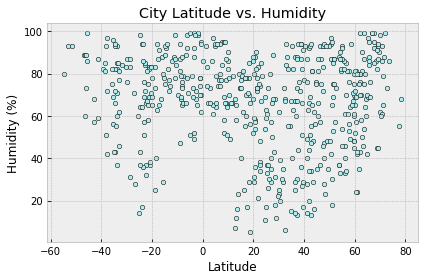

In [390]:
fig2, ax2 = plt.subplots()

df_weather_data_clean[['lat', 'humidity']].plot(kind='scatter', 
                                                ax=ax2, 
                                                x='lat', 
                                                y='humidity', 
                                                c='paleturquoise', 
                                                marker='o', 
                                                edgecolor='black')

ax2.set(title='City Latitude vs. Humidity',
        xlabel='Latitude',
        ylabel='Humidity (%)'
       )

fig2.tight_layout()

fig2.savefig('output_data/latitude_vs_humidity.png', dpi=200, facecolor='w')

## Latitude vs. Cloudiness Plot

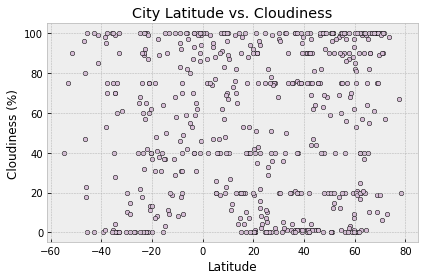

In [391]:
fig3, ax3 = plt.subplots()

df_weather_data_clean[['lat', 'cloudiness']].plot(kind='scatter', 
                                                ax=ax3, 
                                                x='lat', 
                                                y='cloudiness', 
                                                c='thistle', 
                                                marker='o', 
                                                edgecolor='black')

ax3.set(title='City Latitude vs. Cloudiness',
        xlabel='Latitude',
        ylabel='Cloudiness (%)'
       )

fig3.tight_layout()

fig3.savefig('output_data/latitude_vs_cloudiness.png', dpi=200, facecolor='w')

## Latitude vs. Wind Speed Plot

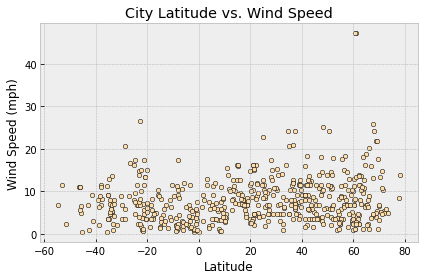

In [392]:
fig4, ax4 = plt.subplots()

df_weather_data_clean[['lat', 'windspeed']].plot(kind='scatter', 
                                                ax=ax4, 
                                                x='lat', 
                                                y='windspeed', 
                                                c='navajowhite', 
                                                marker='o', 
                                                edgecolor='black')

ax4.set(title='City Latitude vs. Wind Speed',
        xlabel='Latitude',
        ylabel='Wind Speed (mph)'
       )

fig4.tight_layout()

fig4.savefig('output_data/latitude_vs_windspeed.png', dpi=200, facecolor='w')

## Linear Regression

In [393]:
# create data frames for northern and southern hemispheres

df_north_hemisphere = df_weather_data_clean[df_weather_data_clean['lat'] >= 0].reset_index(inplace=False, drop=True)
df_south_hemisphere = df_weather_data_clean[df_weather_data_clean['lat'] <= 0].reset_index(inplace=False, drop=True)


In [394]:
df_north_hemisphere.head()

,city,lat,lon,temp_max,humidity,cloudiness,windspeed,country,date/time
0,nanortalik,60.1432,-45.2371,34.79,69,85,12.97,GL,1.619936e+09
1,port blair,11.6667,92.7500,86.58,66,14,10.56,IN,1.619936e+09
2,ayan,56.4500,138.1667,32.54,85,97,8.77,RU,1.619936e+09
3,inuvik,68.3499,-133.7218,24.80,86,100,4.61,CA,1.619936e+09
4,deputatskiy,69.3000,139.9000,25.12,87,100,5.41,RU,1.619936e+09


In [395]:
df_south_hemisphere.head()

,city,lat,lon,temp_max,humidity,cloudiness,windspeed,country,date/time
0,vao,-22.6667,167.4833,74.43,72,92,26.46,NC,1.619936e+09
1,cape town,-33.9258,18.4232,61.00,93,0,5.75,ZA,1.619936e+09
2,puerto ayora,-0.7393,-90.3518,73.00,95,46,5.19,EC,1.619936e+09
3,ushuaia,-54.8000,-68.3000,35.60,80,40,6.91,AR,1.619936e+09
4,dunedin,-45.8742,170.5036,55.11,73,18,4.99,NZ,1.619936e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [396]:
# set variables for regression
lat = df_north_hemisphere['lat']
temp_max = df_north_hemisphere['temp_max']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')


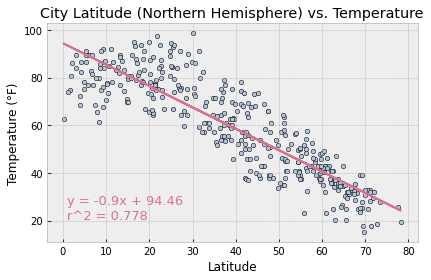

In [397]:
# plot scatter and regression line

fig5, ax5 = plt.subplots()

df_north_hemisphere[['lat', 'temp_max']].plot(kind='scatter', 
                                                ax=ax5, 
                                                x='lat', 
                                                y='temp_max', 
                                                c='lightsteelblue', 
                                                marker='o', 
                                                edgecolor='black')

ax5.plot(lat, regress_values, c='palevioletred')
ax5.annotate(regress_annotate,
             xy=(0, 0),
             xycoords='axes fraction',
             xytext=(20, 20),
             textcoords='offset pixels',
             horizontalalignment='left',
             verticalalignment='bottom',
             color = 'palevioletred',
             fontsize=13)

ax5.set(title='City Latitude (Northern Hemisphere) vs. Temperature',
        xlabel='Latitude',
        ylabel='Temperature (°F)'
       )

fig5.tight_layout()


fig5.savefig('output_data/latitude_vs_temperature_north_hemisphere.png', dpi=200, facecolor='w')

The above plot shows a clear trend between latitude and temperature for cities in the northern hemisphere. In general, cities further north from the equator are colder than those closer to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [398]:
# set variables for regression
lat = df_south_hemisphere['lat']
temp_max = df_south_hemisphere['temp_max']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

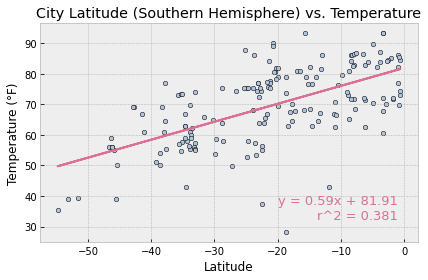

In [399]:
# plot scatter and regression line

fig6, ax6 = plt.subplots()

df_south_hemisphere[['lat', 'temp_max']].plot(kind='scatter', 
                                                ax=ax6, 
                                                x='lat', 
                                                y='temp_max', 
                                                c='lightsteelblue', 
                                                marker='o', 
                                                edgecolor='black')

ax6.plot(lat, regress_values, c='palevioletred')
ax6.annotate(regress_annotate,
             xy=(1, 0),
             xycoords='axes fraction',
             xytext=(-20, 20),
             textcoords='offset pixels',
             horizontalalignment='right',
             verticalalignment='bottom',
             color = 'palevioletred',
             fontsize=13)

ax6.set(title='City Latitude (Southern Hemisphere) vs. Temperature',
        xlabel='Latitude',
        ylabel='Temperature (°F)'
       )

fig6.tight_layout()


fig6.savefig('output_data/latitude_vs_temperature_south_hemisphere.png', dpi=200, facecolor='w')

The above plot shows a clear trend between latitude and temperature for cities in the southern hemisphere. In general, cities further south from the equator are colder than those closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [400]:
# set variables for regression
lat = df_north_hemisphere['lat']
temp_max = df_north_hemisphere['humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

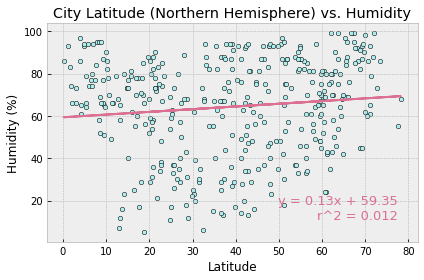

In [401]:
# plot scatter and regression line

fig7, ax7 = plt.subplots()

df_north_hemisphere[['lat', 'humidity']].plot(kind='scatter', 
                                                ax=ax7, 
                                                x='lat', 
                                                y='humidity', 
                                                c='paleturquoise', 
                                                marker='o', 
                                                edgecolor='black')

ax7.plot(lat, regress_values, c='palevioletred')
ax7.annotate(regress_annotate,
             xy=(1, 0),
             xycoords='axes fraction',
             xytext=(-20, 20),
             textcoords='offset pixels',
             horizontalalignment='right',
             verticalalignment='bottom',
             color = 'palevioletred',
             fontsize=13)

ax7.set(title='City Latitude (Northern Hemisphere) vs. Humidity',
        xlabel='Latitude',
        ylabel='Humidity (%)'
       )

fig7.tight_layout()


fig7.savefig('output_data/latitude_vs_humidity_north_hemisphere.png', dpi=200, facecolor='w')

The above plot shows that there isn't a trend between latitude and humidity. Factors other than latitude most likely affect humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [402]:
# set variables for regression
lat = df_south_hemisphere['lat']
temp_max = df_south_hemisphere['humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

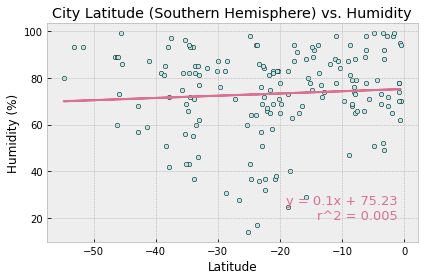

In [403]:
# plot scatter and regression line

fig8, ax8 = plt.subplots()

df_south_hemisphere[['lat', 'humidity']].plot(kind='scatter', 
                                                ax=ax8, 
                                                x='lat', 
                                                y='humidity', 
                                                c='paleturquoise', 
                                                marker='o', 
                                                edgecolor='black')

ax8.plot(lat, regress_values, c='palevioletred')
ax8.annotate(regress_annotate,
             xy=(1, 0),
             xycoords='axes fraction',
             xytext=(-20, 20),
             textcoords='offset pixels',
             horizontalalignment='right',
             verticalalignment='bottom',
             color = 'palevioletred',
             fontsize=13)

ax8.set(title='City Latitude (Southern Hemisphere) vs. Humidity',
        xlabel='Latitude',
        ylabel='Humidity (%)'
       )

fig8.tight_layout()


fig8.savefig('output_data/latitude_vs_humidity_south_hemisphere.png', dpi=200, facecolor='w')

The above plot shows that there isn't a strong trend between latitude and humidity. Factors other than latitude most likely affect humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [404]:
# set variables for regression
lat = df_north_hemisphere['lat']
temp_max = df_north_hemisphere['cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

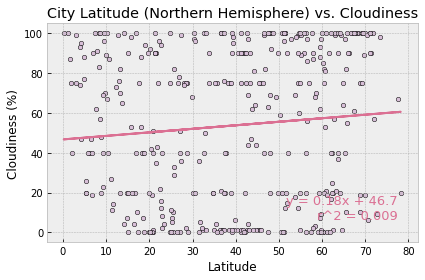

In [405]:
# plot scatter and regression line

fig9, ax9 = plt.subplots()

df_north_hemisphere[['lat', 'cloudiness']].plot(kind='scatter', 
                                                ax=ax9, 
                                                x='lat', 
                                                y='cloudiness', 
                                                c='thistle', 
                                                marker='o', 
                                                edgecolor='black')

ax9.plot(lat, regress_values, c='palevioletred')
ax9.annotate(regress_annotate,
             xy=(1, 0),
             xycoords='axes fraction',
             xytext=(-20, 20),
             textcoords='offset pixels',
             horizontalalignment='right',
             verticalalignment='bottom',
             color = 'palevioletred',
             fontsize=13)

ax9.set(title='City Latitude (Northern Hemisphere) vs. Cloudiness',
        xlabel='Latitude',
        ylabel='Cloudiness (%)'
       )

fig9.tight_layout()


fig9.savefig('output_data/latitude_vs_cloudiness_north_hemisphere.png', dpi=200, facecolor='w')

The above plot shows that there isn't a strong trend between latitude and cloudiness. Factors other than latitude most likely affect cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [406]:
# set variables for regression
lat = df_south_hemisphere['lat']
temp_max = df_south_hemisphere['cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

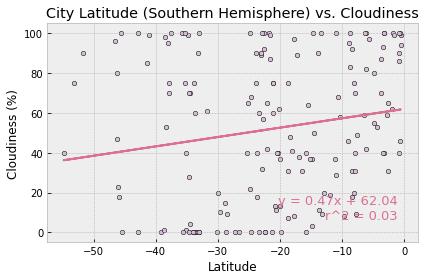

In [407]:
# plot scatter and regression line

fig10, ax10 = plt.subplots()

df_south_hemisphere[['lat', 'cloudiness']].plot(kind='scatter', 
                                                ax=ax10, 
                                                x='lat', 
                                                y='cloudiness', 
                                                c='thistle', 
                                                marker='o', 
                                                edgecolor='black')

ax10.plot(lat, regress_values, c='palevioletred')
ax10.annotate(regress_annotate,
             xy=(1, 0),
             xycoords='axes fraction',
             xytext=(-20, 20),
             textcoords='offset pixels',
             horizontalalignment='right',
             verticalalignment='bottom',
             color = 'palevioletred',
             fontsize=13)

ax10.set(title='City Latitude (Southern Hemisphere) vs. Cloudiness',
        xlabel='Latitude',
        ylabel='Cloudiness (%)'
       )

fig10.tight_layout()


fig10.savefig('output_data/latitude_vs_cloudiness_south_hemisphere.png', dpi=200, facecolor='w')

The above plot shows that there isn't a strong trend between latitude and cloudiness. Factors other than latitude most likely affect cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [408]:
# set variables for regression
lat = df_north_hemisphere['lat']
temp_max = df_north_hemisphere['windspeed']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

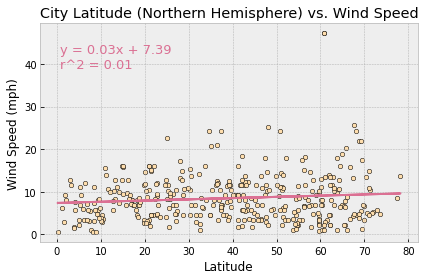

In [409]:
# plot scatter and regression line

fig11, ax11 = plt.subplots()

df_north_hemisphere[['lat', 'windspeed']].plot(kind='scatter', 
                                                ax=ax11, 
                                                x='lat', 
                                                y='windspeed', 
                                                c='navajowhite', 
                                                marker='o', 
                                                edgecolor='black')

ax11.plot(lat, regress_values, c='palevioletred')
ax11.annotate(regress_annotate,
             xy=(0, 1),
             xycoords='axes fraction',
             xytext=(20, -20),
             textcoords='offset pixels',
             horizontalalignment='left',
             verticalalignment='top',
             color = 'palevioletred',
             fontsize=13)

ax11.set(title='City Latitude (Northern Hemisphere) vs. Wind Speed',
        xlabel='Latitude',
        ylabel='Wind Speed (mph)'
       )

fig11.tight_layout()


fig11.savefig('output_data/latitude_vs_windspeed_north_hemisphere.png', dpi=200, facecolor='w')

The above plot shows that there isn't a strong trend between latitude and wind speed. Factors other than latitude most likely affect wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [410]:
# set variables for regression
lat = df_south_hemisphere['lat']
temp_max = df_south_hemisphere['windspeed']

slope, intercept, rvalue, pvalue, stderr = linregress(lat, temp_max)

# values from linear regression
regress_values = lat * slope + intercept

# regression info for annotation
regress_annotate = (f'''y = {str(round(slope, 2))}x + {str(round(intercept, 2))}
r^2 = {round(rvalue**2,3)}''')

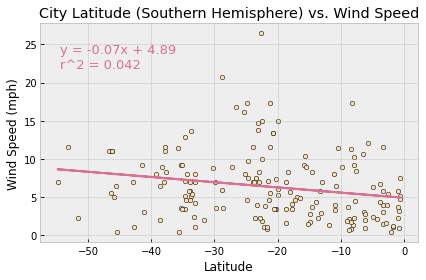

In [411]:
# plot scatter and regression line

fig12, ax12 = plt.subplots()

df_south_hemisphere[['lat', 'windspeed']].plot(kind='scatter', 
                                                ax=ax12, 
                                                x='lat', 
                                                y='windspeed', 
                                                c='navajowhite', 
                                                marker='o', 
                                                edgecolor='black')

ax12.plot(lat, regress_values, c='palevioletred')
ax12.annotate(regress_annotate,
             xy=(0, 1),
             xycoords='axes fraction',
             xytext=(20, -20),
             textcoords='offset pixels',
             horizontalalignment='left',
             verticalalignment='top',
             color = 'palevioletred',
             fontsize=13)

ax12.set(title='City Latitude (Southern Hemisphere) vs. Wind Speed',
        xlabel='Latitude',
        ylabel='Wind Speed (mph)'
       )

fig12.tight_layout()


fig12.savefig('output_data/latitude_vs_windspeed_south_hemisphere.png', dpi=200, facecolor='w')

The above plot shows that there isn't a strong trend between latitude and wind speed. Factors other than latitude most likely affect wind speed.